<a href="https://colab.research.google.com/github/josephasal/cosmo_inference/blob/main/neural_network/nn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Training the neural network based on training data generated

In [3]:
#importing the csv of training data
import numpy as np
import pandas as pd

filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/Neural net/noisy_training_dataNEW3.csv'
training_data = pd.read_csv(filepath)

training_data.head()


,mu_z1,mu_z2,mu_z3,mu_z4,mu_z5,mu_z6,mu_z7,mu_z8,mu_z9,mu_z10,...,mu_z93,mu_z94,mu_z95,mu_z96,mu_z97,mu_z98,mu_z99,mu_z100,omega_m,h
0,28.277006,33.157146,34.816964,35.944349,36.202266,37.077655,37.005286,37.685046,37.964525,37.976690,...,44.077487,44.157694,44.014550,44.269085,43.753782,44.246756,44.322482,44.233716,0.264561,0.707794
1,27.943042,33.095729,34.490239,35.255804,35.857653,36.737848,37.018210,37.274371,37.350818,37.925793,...,43.795228,43.494328,43.927129,44.115475,43.732285,43.963431,43.967934,43.828339,0.250102,0.784790
2,27.936240,33.086167,34.610360,35.388213,36.636198,36.840904,36.846863,37.540340,37.800098,38.032840,...,43.646458,43.692680,43.968897,43.853578,43.718693,44.107937,44.185639,43.868401,0.252667,0.773433
3,28.306851,33.541360,34.802578,35.795542,36.056977,37.097166,37.013392,37.138803,37.884614,38.139775,...,43.656346,43.923999,43.807336,43.885752,44.094756,43.620775,43.993546,43.887661,0.337867,0.738097
4,28.365227,33.439344,35.157117,36.222710,36.096520,36.749319,37.287273,37.919057,38.066387,38.339624,...,44.185713,43.933752,43.941846,44.248132,44.170756,44.101418,44.127955,44.050108,0.291433,0.663393


In [4]:
# getting the columns for my X values, which is distance modulus at various redshifts
feature_columns = [f'mu_z{i+1}' for i in range(100)]
X = training_data[feature_columns].values

#getting the columns for my Y values which are omega m and h
Y = training_data[['omega_m', 'h']].values

#Splitting data into train, cross validation and test
* 70% train, 20% cross validaiton, 10% test

In [5]:
from sklearn.model_selection import train_test_split #so that i can do this randomly instead of using pandas

#split off the test set (10% of 5000 so 1000 samples for testing)
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.1, random_state= 69)

#Split the remaining samples 9k samples (stored in x and y temp) into training and cross validation sets

X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size =2000/9000, random_state = 69)

#checking sizes of train, cross_val and test
print('Training shape:', X_train.shape, Y_train.shape)
print('Cross Validation shape:', X_val.shape, Y_val.shape)
print('Test shape:', X_test.shape, Y_test.shape)

Training shape: (7000, 100) (7000, 2)
Cross Validation shape: (2000, 100) (2000, 2)
Test shape: (1000, 100) (1000, 2)


Normalising the data so mean is 0 and variance is 1

In [6]:
from sklearn.preprocessing import StandardScaler
#scaling X

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

#scaling y

scaler_y = StandardScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train)
Y_val_scaled = scaler_y.transform(Y_val)
Y_test_scaled = scaler_y.transform(Y_test)

#Basic Neural Network

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#call back that monitors the validation loss, makes sure it doesnt increase, prevents over fitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

#simple neural network
model = models.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(32, activation = 'relu', kernel_regularizer=regularizers.l2(1e-5)),
    layers.Dense(2) #output of omega m and h
])

#compiling
optimizer = Adam(learning_rate = 1e-4)
model.compile(optimizer = optimizer, loss = 'mse')

#train
history = model.fit(X_train_scaled, Y_train_scaled,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val_scaled, Y_val_scaled), callbacks = [early_stopping])


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.7490 - val_loss: 0.8222
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.7747 - val_loss: 0.6718
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6464 - val_loss: 0.6081
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5876 - val_loss: 0.5638
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5524 - val_loss: 0.5331
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5262 - val_loss: 0.5099
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5025 - val_loss: 0.4925
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4780 - val_loss: 0.4768
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4685 - val_loss: 0.4640
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4543 - val_loss: 0.4542
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4422 - val_loss: 0.4447
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━

In [8]:
#evaluating accuracy on the test set
test_loss = model.evaluate(X_test_scaled, Y_test_scaled)
val_loss = model.evaluate(X_val_scaled, Y_val_scaled)
print('Test loss(MSE):', test_loss)
print('Validation Loss (MSE):', val_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3884
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3770
Test loss(MSE): 0.3997540771961212
Validation Loss (MSE): 0.38863131403923035


In [9]:
#predictions on the scaled test data
Y_pred_sim_scaled = model.predict(X_test_scaled)

# inverse predictions back to the original scale
Y_pred_sim = scaler_y.inverse_transform(Y_pred_sim_scaled)

#mean and standard deviation
mean_pred= np.mean(Y_pred_sim, axis=0)
std_pred = np.std(Y_pred_sim, axis = 0)

print(f"Predicted Omega_m: {mean_pred[0]:.4f} +/- {std_pred[0]:.4f}")
print(f"Predicted h:       {mean_pred[1]:.4f} +/- {std_pred[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicted Omega_m: 0.2999 +/- 0.0185
Predicted h:       0.7254 +/- 0.0433


In [10]:
!pip install SciencePlots

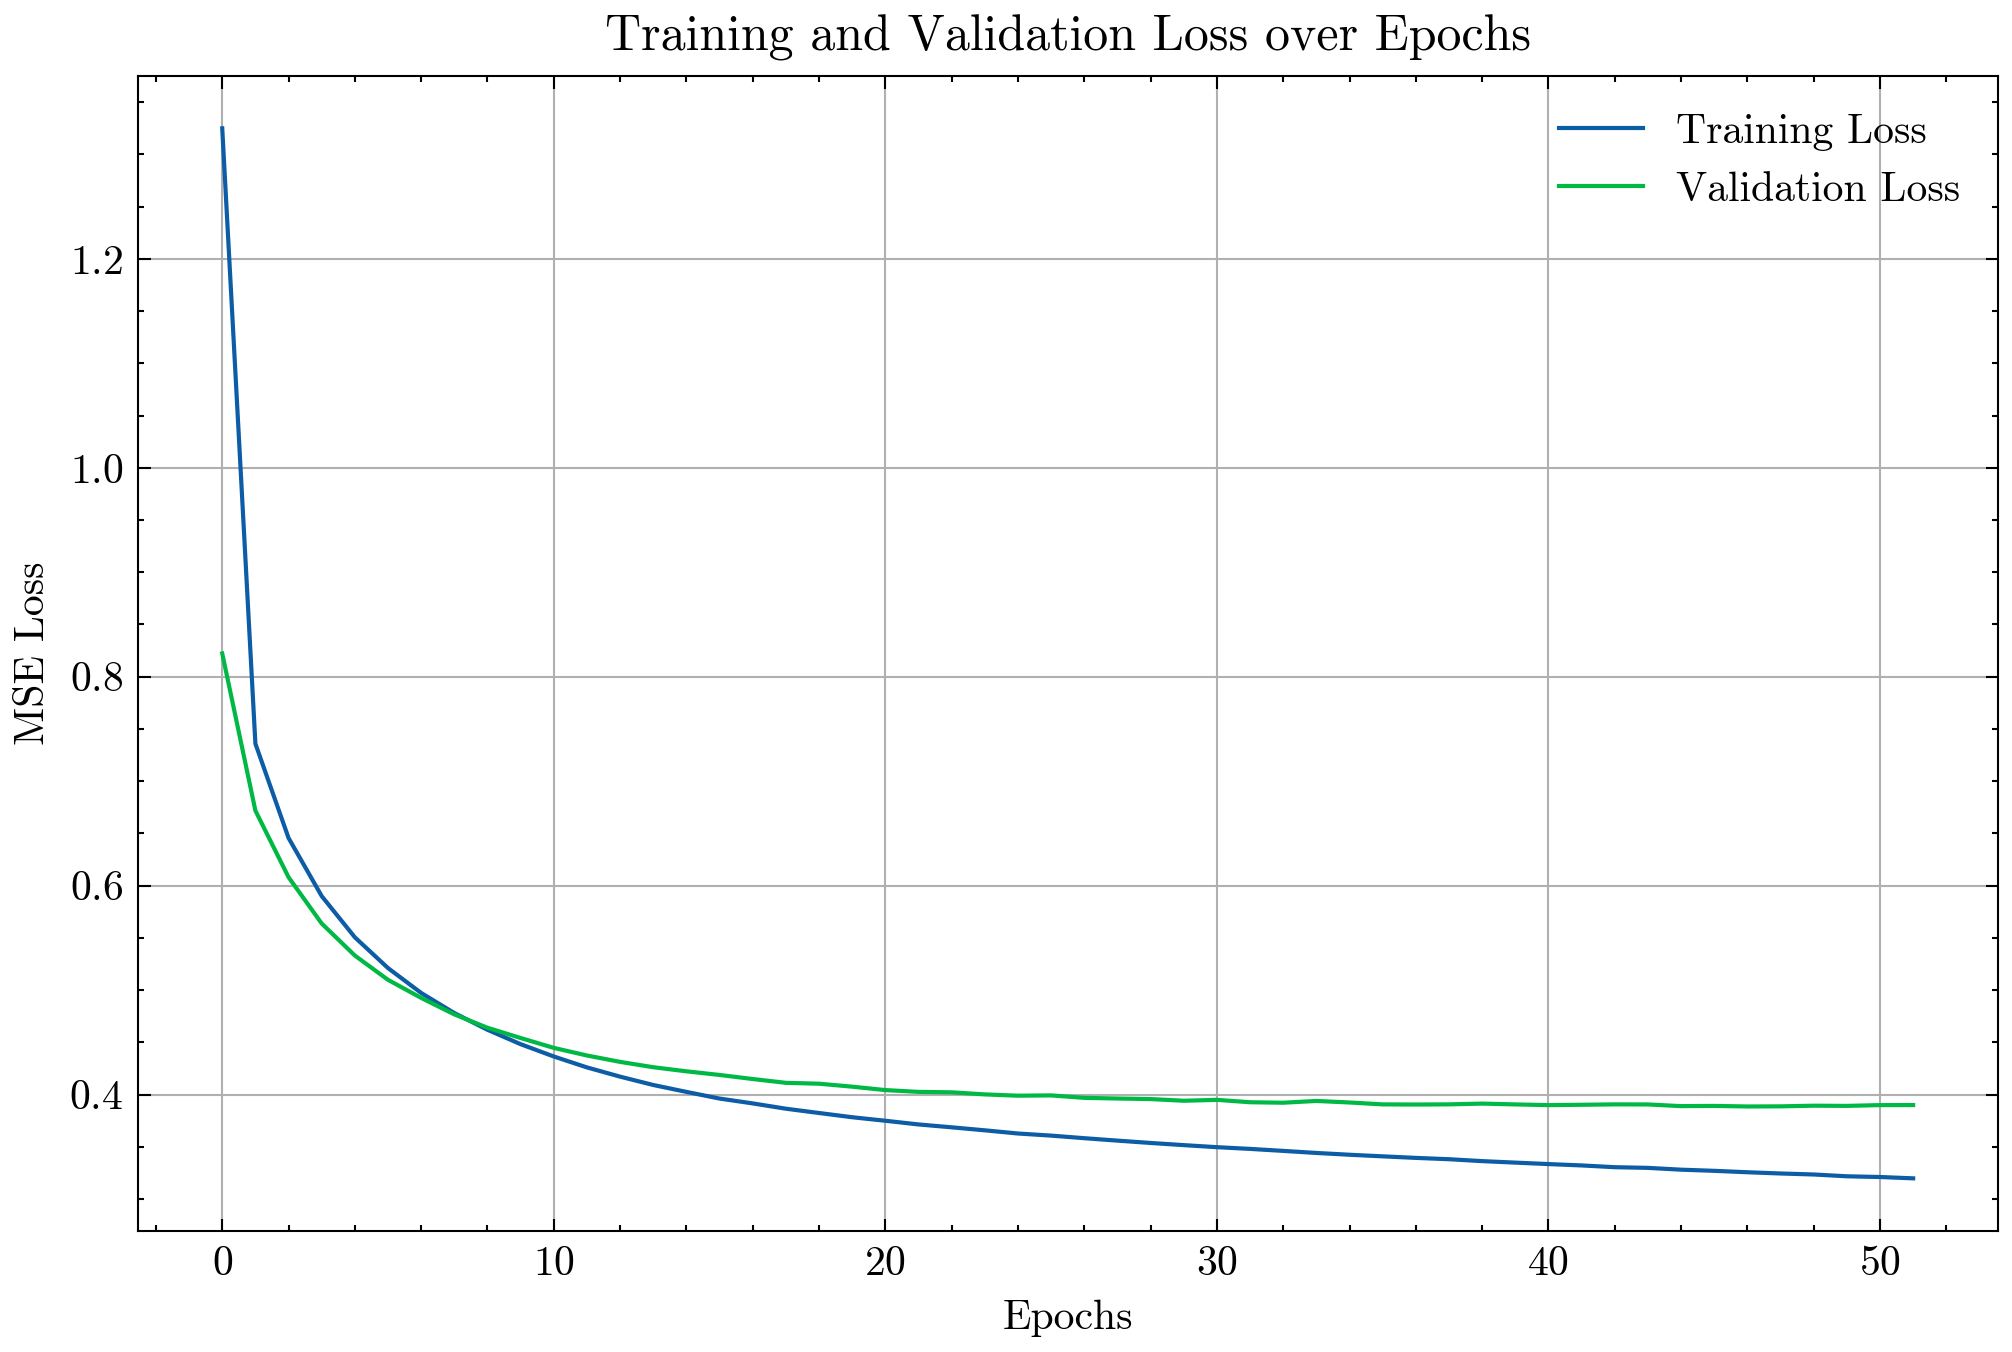

In [11]:
import matplotlib.pyplot as plt
import scienceplots


#loss curves vs epochs
plt.figure(figsize=(8, 5), dpi = 300)
plt.style.use(['science', 'no-latex'])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred_sim.shape)

Y_test shape: (1000, 2)
Y_pred shape: (1000, 2)


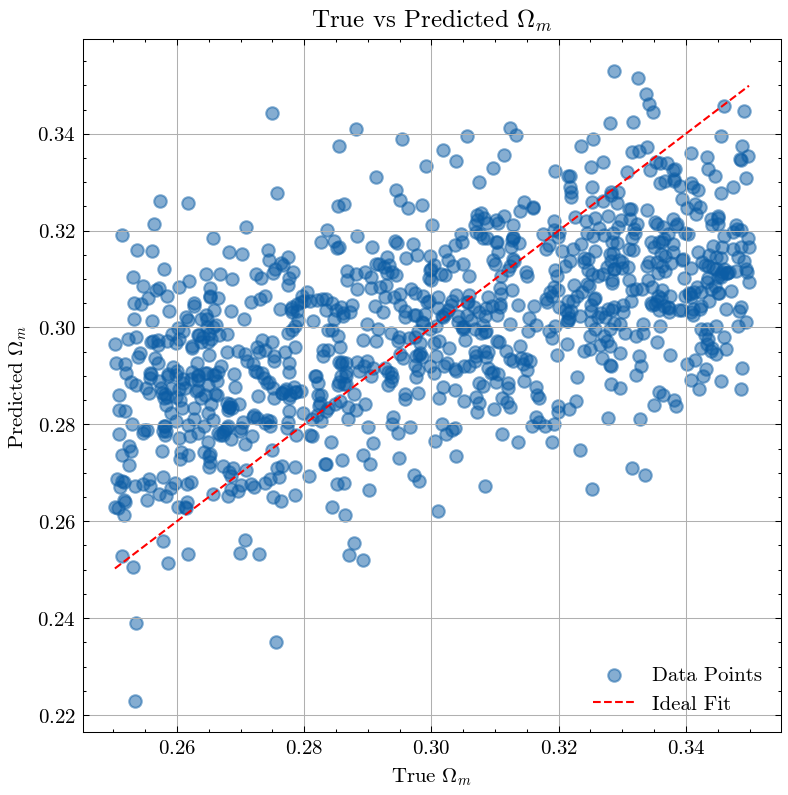

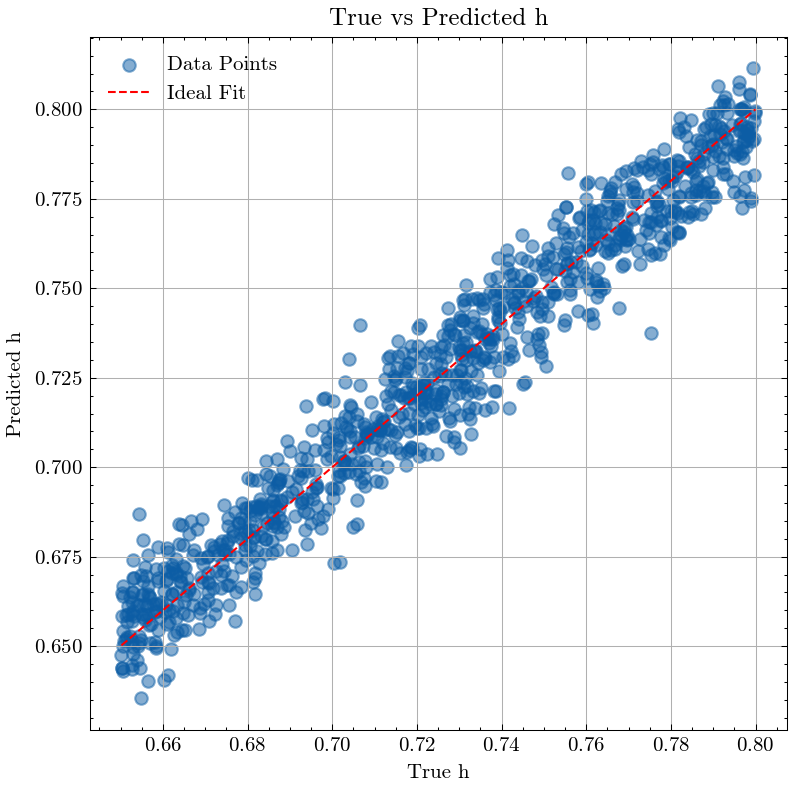

In [13]:
#True vs predicted values

# Scatter plot for Omega_m
plt.figure(figsize=(6, 6), dpi = 150)
plt.style.use(['science', 'no-latex'])
plt.scatter(Y_test[:, 0], Y_pred_sim[:, 0], alpha=0.5, label="Data Points")
plt.plot([Y_test[:, 0].min(), Y_test[:, 0].max()],
         [Y_test[:, 0].min(), Y_test[:, 0].max()], 'r--', label="Ideal Fit")
plt.xlabel('True $\Omega_{m}$')
plt.ylabel('Predicted $\Omega_{m}$')
plt.title('True vs Predicted $\Omega_{m}$')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for h
plt.figure(figsize=(6, 6), dpi = 150)
plt.style.use(['science', 'no-latex'])
plt.scatter(Y_test[:, 1], Y_pred_sim[:, 1], alpha=0.5, label="Data Points")
plt.plot([Y_test[:, 1].min(), Y_test[:, 1].max()],
         [Y_test[:, 1].min(), Y_test[:, 1].max()], 'r--', label="Ideal Fit")
plt.xlabel('True h')
plt.ylabel('Predicted h')
plt.title('True vs Predicted h')
plt.legend()
plt.grid(True)
plt.show()

#Using this Neural Network on the observational data provided

In [14]:
#loading in the supernova data set
import numpy as np
import pandas as pd

filepath = '/content/drive/MyDrive/Colab Notebooks/Bayesian Stats in Cosmology/Restructured code/LOWZ+ESSENCE+SNLS.csv'
supernova_df = pd.read_csv(filepath)

#defining variables
redshift = supernova_df['Z'].values
distance_mod = supernova_df['MU'].values
err_distance_mod = supernova_df['MUERR']  #can maybe incorporate this into a bayesian neural network??
supernova_df.shape

(151, 15)

Observational vs Simulated data plot

In [15]:
#redhsift grid
target_z = np.linspace(min(redshift),max(redshift),100)

#interpolated the observed distance modulus on the grid
from scipy.interpolate import interp1d

interp_func = interp1d(redshift, distance_mod, kind = 'linear', fill_value = 'extrapolate')
distance_mod_grid = interp_func(target_z)

#reshape to (1,100) so it matched the NN input
X_obs = distance_mod_grid.reshape(1,-1)

#scale with the same scaler
X_obs_scaled = scaler_X.transform(X_obs)

#predict using the trained model
Y_pred_obs_scaled = model.predict(X_obs_scaled)

#inverse the scale
Y_pred_obs = scaler_y.inverse_transform(Y_pred_sim)

#print the values
predicted_omega_m, predicted_h = Y_pred_obs[0]

print(f"Predicted Omega_m (Obs Data): {predicted_omega_m:.4f}")
print(f"Predicted h (Obs Data):       {predicted_h:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Omega_m (Obs Data): 0.3084
Predicted h (Obs Data):       0.7576


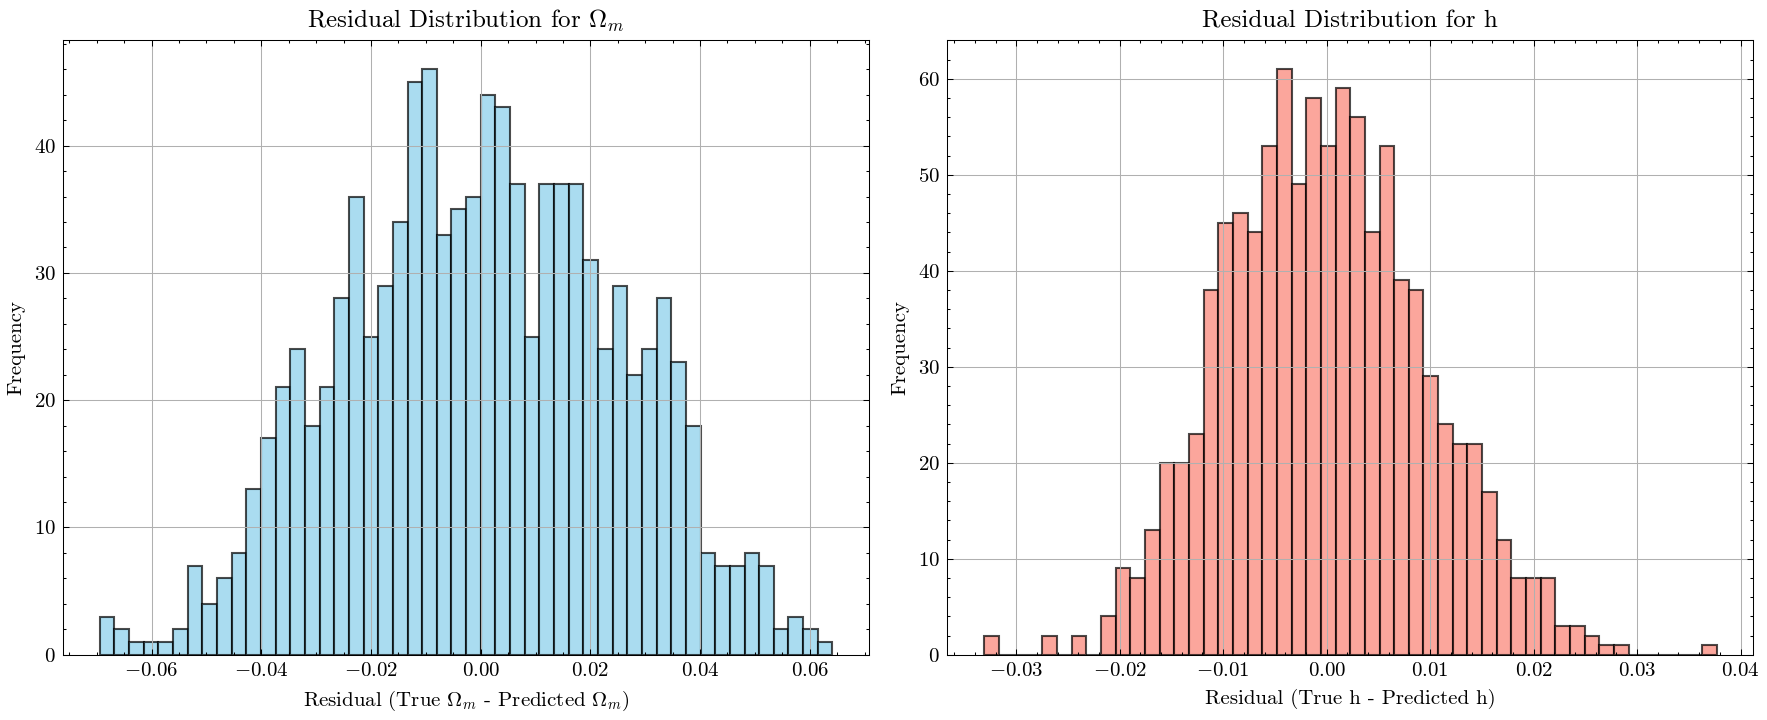

In [17]:
#residuals plot

#calculate residuals: (true - predicted)
residuals_omega = Y_test[:, 0] - Y_pred_sim[:, 0]
residuals_h     = Y_test[:, 1] - Y_pred_sim[:, 1]

plt.figure(figsize=(12, 5), dpi=150)

#residuals for Omega_m
plt.subplot(1, 2, 1)
plt.hist(residuals_omega, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residual (True $\Omega_m$ - Predicted $\Omega_m$)')
plt.ylabel('Frequency')
plt.title('Residual Distribution for $\Omega_m$')
plt.grid(True)

#residuals for h
plt.subplot(1, 2, 2)
plt.hist(residuals_h, bins=50, alpha=0.7, color='salmon', edgecolor='black')
plt.xlabel('Residual (True h - Predicted h)')
plt.ylabel('Frequency')
plt.title('Residual Distribution for h')
plt.grid(True)

plt.tight_layout()
plt.show()

#Grid search tuning
* Will run a grid search with different parameters to see which one gives the lowest loss
*Varying batch size neuron number and layer number

In [22]:
from sklearn.model_selection import ParameterGrid

#fix these parameters, we arent tuning them
global_learning_rate = 1e-4
global_l2_reg = 1e-5

#function to build the neural network with different layer numbers and neurons
def build_nn(num_layers, neurons, learning_rate = global_learning_rate, l2_reg = global_l2_reg):
  """ Function that builds a nn with specified layers and neurons, everything else has to be defined before hand"""

  model = models.Sequential()
  model.add(layers.Input(shape = (X_train_scaled.shape[1],)))

  #make the nn with the layer
  for _ in range(num_layers):
    model.add(layers.Dense(neurons, activation = 'relu', kernel_regularizer = regularizers.l2(l2_reg)))
    model.add(layers.BatchNormalization())

  #last layer gives two valus omega m and h
  model.add(layers.Dense(2))

  optimizer = Adam(learning_rate = learning_rate)
  model.compile(optimizer = optimizer, loss = 'mse')

  return model


#parameter grid
param_grid = {
    'num_layers':[1,2,3],
    'neurons':[32,64,128],
    'batch_size':[16,32,64]

}

#make the grid
grid = list(ParameterGrid(param_grid))
print(f'Total Combinations:{len(grid)}')

#early stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

results = {}

for i, params in enumerate(grid):
  print(f'Combination {i+1}: {params}')


  #build model with current params
  test_model = build_nn(num_layers = params['num_layers'],
                        neurons = params['neurons'],
                        )
  #train the model
  history = test_model.fit(X_train_scaled, Y_train_scaled,
                           epochs = 100,
                           batch_size = params['batch_size'],
                           validation_data = (X_val_scaled, Y_val_scaled),
                           callbacks = [early_stopping])
  #best val loss record
  best_val_loss = min(history.history['val_loss'])
  results[tuple(params.items())] = best_val_loss
  print(f'Best Val loss: {best_val_loss}')

#best parameters
best_params = min(results, key = results.get)
print("\nBest hyperparameter combination:")
print(dict(best_params))
print("With validation loss:", results[best_params])

Total Combinations:27
Combination 1: {'batch_size': 16, 'neurons': 32, 'num_layers': 1}
Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.1696 - val_loss: 1.3933
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.2824 - val_loss: 1.0265
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9929 - val_loss: 0.8075
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8068 - val_loss: 0.6722
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6897 - val_loss: 0.5889
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6241 - val_loss: 0.5313
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5639 - val_loss: 0.4918
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5336 - val_loss: 0.4629
Epoch 9/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5174 - val_loss: 0.4406
Epoch 10/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5123 - val_loss: 0.4253
Epoch 11/100
438/438 ━━━━━━━━━━━━━━━━━━━━

Best combination is 1 hidden layer with 32 neurons

#Creating a table of these results

In [26]:
results_list = []
for param_tuple, val_loss in results.items():
  param_dictionary = dict(param_tuple)
  param_dictionary['val_loss'] = val_loss
  results_list.append(param_dictionary)

#make a dataframe
parameter_results = pd.DataFrame(results_list)

#sort by validation loss
parameter_results = parameter_results.sort_values(by = 'val_loss')

#rename columns to look nicer
parameter_results.rename(columns = {
    'num_layers': 'Hidden layers',
    'neurons': 'Neurons per layer',
    'batch_size': 'Batch Size',
    'val_loss': 'Validation loss'

}, inplace = True)

#convert to csv
parameter_results.to_csv('Layer_neuron_tuning_results', index = False)

parameter_results.head()

,Batch Size,Neurons per layer,Hidden layers,Validation loss
0,16,32,1,0.364866
18,64,32,1,0.367405
9,32,32,1,0.374643
2,16,32,3,0.374892
3,16,64,1,0.378756


In [25]:
#exporting to latex
latex_table = parameter_results.to_latex(index=False,
                                  caption='Neurons, layers and batch size tuning Results',
                                  label='tab:hyperparams',
                                  float_format="%.4f")
print(latex_table)

\begin{table}
\caption{Neurons, layers and batch size tuning Results}
\label{tab:hyperparams}
\begin{tabular}{rrrr}
\toprule
Batch Size & Neurons per layer & Hidden layers & Validation loss \\
\midrule
16 & 32 & 1 & 0.3649 \\
64 & 32 & 1 & 0.3674 \\
32 & 32 & 1 & 0.3746 \\
16 & 32 & 3 & 0.3749 \\
16 & 64 & 1 & 0.3788 \\
64 & 64 & 1 & 0.3790 \\
32 & 64 & 1 & 0.3794 \\
16 & 32 & 2 & 0.3795 \\
32 & 32 & 2 & 0.3797 \\
64 & 32 & 2 & 0.3854 \\
16 & 64 & 2 & 0.3876 \\
32 & 64 & 2 & 0.3899 \\
32 & 32 & 3 & 0.3927 \\
16 & 128 & 1 & 0.3963 \\
64 & 32 & 3 & 0.3974 \\
32 & 128 & 1 & 0.3976 \\
16 & 64 & 3 & 0.3981 \\
64 & 128 & 1 & 0.4041 \\
16 & 128 & 2 & 0.4070 \\
64 & 64 & 2 & 0.4077 \\
64 & 64 & 3 & 0.4129 \\
32 & 128 & 2 & 0.4132 \\
32 & 64 & 3 & 0.4175 \\
64 & 128 & 2 & 0.4331 \\
16 & 128 & 3 & 0.4381 \\
32 & 128 & 3 & 0.4734 \\
64 & 128 & 3 & 0.4876 \\
\bottomrule
\end{tabular}
\end{table}



#Further trying to optimise and reduce the val loss